In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist



# Read training data from text file
train_data = np.loadtxt('/content/prostate.training.txt', skiprows=1)
X = train_data[:, :-1]
y = train_data[:, -1]


# Center and scale features for ridge regression
scaler = StandardScaler()
X_ridge = scaler.fit_transform(X)

# Ridge regression
def ridge_regression(X, y, alpha):
    n, d = X.shape
    I = np.identity(d)
    beta = np.linalg.inv(X.T.dot(X) + alpha * I).dot(X.T).dot(y)
    return beta

alpha = 1
beta_ridge = ridge_regression(X_ridge, y, alpha)
mse_ridge = mean_squared_error(y, X_ridge.dot(beta_ridge))
print("MSE for ridge regression:", mse_ridge)

# Generalized ridge regression with reproducing Gaussian kernel
def gaussian_kernel(X, Y, sigma):
    K = np.exp(-sigma * cdist(X, Y)**2)
    return K

def generalized_ridge_regression(X, y, alpha, kernel, sigma):
    n, d = X.shape
    K = kernel(X, X, sigma)
    I = np.identity(n)
    beta = np.linalg.inv(K + alpha * I).dot(y)
    return beta

alpha = 1
sigma = 1
kernel = lambda X, Y, sigma: gaussian_kernel(X, Y, sigma)
beta_gen_ridge = generalized_ridge_regression(X, y, alpha, kernel, sigma)
K_X = kernel(X, X, sigma)
mse_gen_ridge = mean_squared_error(y, K_X.dot(beta_gen_ridge))
print("MSE for generalized ridge regression:", mse_gen_ridge)


MSE for ridge regression: 5.097014313093951
MSE for generalized ridge regression: 1.478470136807774


In [114]:

# Read testing data from text file
test_data = np.loadtxt('/content/prostate.testing.txt',skiprows=1)
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Center and scale features for ridge regression on test data
X_test_ridge = scaler.transform(X_test)

# Make predictions on test data using ridge regression
y_pred_ridge = X_test_ridge.dot(beta_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE for ridge regression on test data:", mse_test_ridge)

# Make predictions on test data using generalized ridge regression with reproducing Gaussian kernel
K_X_test = kernel(X_test, X, sigma)
y_pred_gen_ridge = K_X_test.dot(beta_gen_ridge)
mse_test_gen_ridge = mean_squared_error(y_test, y_pred_gen_ridge)
print("MSE for generalized ridge regression on test data:", mse_test_gen_ridge)


MSE for ridge regression on test data: 8.406828694881582
MSE for generalized ridge regression on test data: 20.769531079500133


In [127]:
mse_test_ridge

array(8.40682869)

In [128]:

import matplotlib.pyplot as plt

# Lambda values to test
lambdas = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
lambdas = np.array(lambdas)
lambdas

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [129]:
type(lambdas)

numpy.ndarray

In [130]:
# mse_test_ridge = np.array(mse_test_ridge)
# mse_test_gen_ridge = np.array(mse_test_gen_ridge)
mse_test_ridge


array(8.40682869)

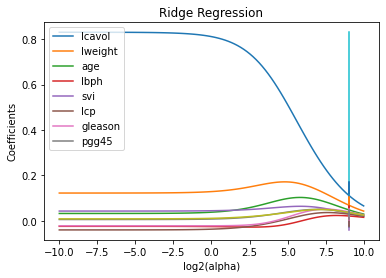

In [245]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt


train_data = np.loadtxt('/content/prostate.training.txt', skiprows=1)
X_train= train_data[:, :-1]
y_train = train_data[:, -1]

# Read testing data from text file
test_data = np.loadtxt('/content/prostate.testing.txt',skiprows=1)
X_test = test_data[:, :-1]
y_test = test_data[:, -1]



# Method I: Ridge regression with cross-validation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
alphas = np.logspace(-, 3, 100)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_scaled, y_train)

coefs_ridge = []
df_ridge = []

for alpha in alphas:
    # Method I
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs_ridge.append(ridge.coef_)
    df_ridge.append(np.sum(ridge.coef_ != 0))


# Convert to arrays and plot
coefs_ridge = np.array(coefs_ridge)
df_ridge = np.array(df_ridge)

plt.figure()
plt.plot(np.log2(alphas), coefs_ridge)
plt.plot(df_ridge,coefs_ridge)
plt.xlabel('log2(alpha)')
plt.ylabel('Coefficients')
plt.title('Ridge Regression')
plt.legend(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], loc='upper left')



In [249]:
from sklearn.metrics import mean_squared_error

# Define lambdas
lambdas = np.arange(0, 101, 10)

# Compute mean squared error for Ridge regression
mse_ridge = []
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred = ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_ridge.append(mse)

# Compute mean squared error for Kernel Ridge regression
mse_kernel_ridge = []
for l in lambdas:
    kernel_ridge = KernelRidge(alpha=l, kernel='rbf', gamma=1.0/X_train.shape[1])
    kernel_ridge.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred = kernel_ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_kernel_ridge.append(mse)

# Display results in a table
results = pd.DataFrame({'Lambda': lambdas, 'Ridge Regression': mse_ridge, 'Kernel Ridge Regression': mse_kernel_ridge})
print(results)


    Lambda  Ridge Regression  Kernel Ridge Regression
0        0          0.627530                 4.653667
1       10          0.805692                12.205825
2       20          0.968397                14.708559
3       30          1.116113                16.049389
4       40          1.250760                16.895016
5       50          1.374258                17.479965
6       60          1.488240                17.909752
7       70          1.594043                18.239341
8       80          1.692755                18.500329
9       90          1.785260                18.712225
10     100          1.872285                18.887751


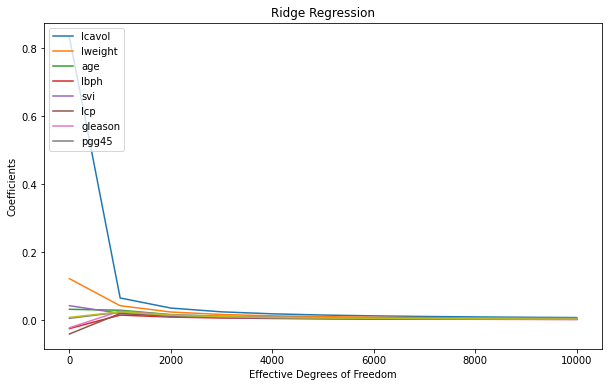

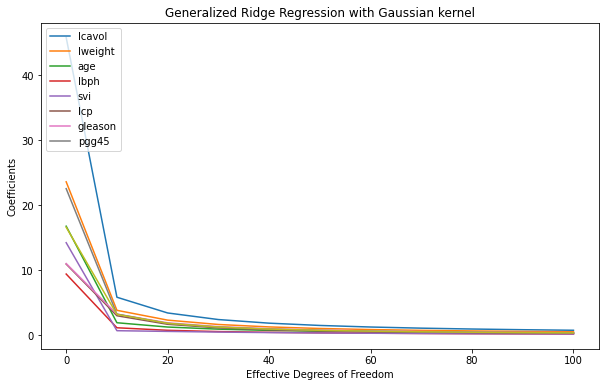

In [253]:
import matplotlib.pyplot as plt

# Define lambda values
lambdas_method1 = np.arange(0, 10001, 1000)
lambdas_method2 = np.arange(0, 101, 10)

# Define lists to store coefficients and df
coefs_ridge = []
df_ridge = []
coefs_kernel_ridge = []
df_kernel_ridge = []

# Loop over lambda values for method 1
for alpha in lambdas_method1:
    # Ridge Regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs_ridge.append(ridge.coef_)
    df_ridge.append(np.sum(ridge.coef_ != 0))

# Loop over lambda values for method 2
for alpha in lambdas_method2:
    # Generalized Ridge Regression with Gaussian kernel
    kernel_ridge = KernelRidge(alpha=alpha, kernel='rbf', gamma=1.0/X_train.shape[1])
    kernel_ridge.fit(X_train_scaled, y_train)
    coefs_kernel_ridge.append(kernel_ridge.dual_coef_.dot(kernel_ridge.X_fit_))
    df_kernel_ridge.append(np.sum(kernel_ridge.dual_coef_ != 0))


# xa = np.arange(0, 5000, 1000)
# Plot the coefficients versus the effective degrees of freedom for both methods
plt.figure(figsize=(10, 6))
plt.plot(lambdas_method1, coefs_ridge)

plt.xlabel('Effective Degrees of Freedom')
plt.ylabel('Coefficients')
plt.title('Ridge Regression')
plt.legend(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], loc='upper left')
plt.figure(figsize=(10, 6))
plt.plot(lambdas_method2, coefs_kernel_ridge)
plt.xlabel('Effective Degrees of Freedom')
plt.ylabel('Coefficients')
plt.title('Generalized Ridge Regression with Gaussian kernel')
plt.legend(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], loc='upper left')
plt.show()
